In [1]:
""" Import and load the datasets """
import pandas as pd
import numpy as np
from src.features.DataProcessor import DataProcessor
from src.models.NaiveBayesClassifier import NaiveBayesClassifier


In [2]:

withOutliers = True
dict = {True: 'without', False: 'with'}

df_train = pd.read_csv(f'../data/interim/train_{dict[withOutliers]}_outliers.csv')
df_test = pd.read_csv(f'../data/interim/test_{dict[withOutliers]}_outliers.csv')

processor = DataProcessor()

# Encode the labels
df_train = processor.encode_labels(df_train,fit=True)
df_test = processor.encode_labels(df_test,fit=False)


In [3]:
""" Features engineering  """
# Fit the pca and scaler on the train data and transform the test data
data_train = processor.remove_correlation(df_train,fit=True)
data_test = processor.remove_correlation(df_test,fit=False)
data_train = processor.scale_data(data_train,fit=True)
data_test = processor.scale_data(data_test,fit=False)

X_train,y_train = processor.split_data(data_train)
X_test,y_test = processor.split_data(data_test)

In [5]:
# Choose which Bayes model to use
clf = NaiveBayesClassifier()
clf.train(X_train,y_train)

Inference time : 1.648565133412679e-07 seconds
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11571
           1       0.84      0.89      0.86      3711
           2       0.98      0.99      0.98      3918

    accuracy                           0.94     19200
   macro avg       0.93      0.94      0.93     19200
weighted avg       0.94      0.94      0.94     19200

auc score for class 0:  0.9808205839651899
auc score for class 1:  0.9779727458116112
auc score for class 2:  0.9972692553050131


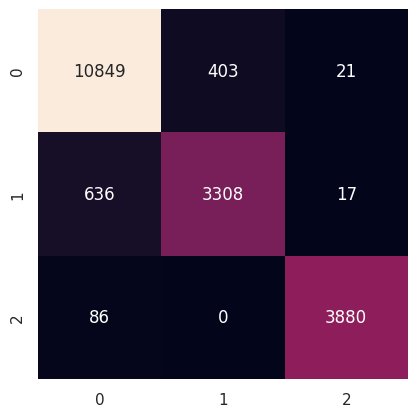

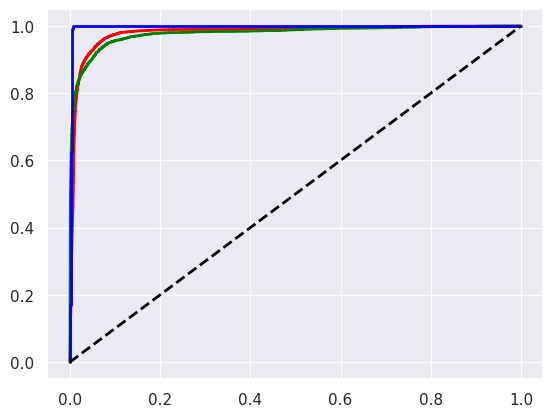

In [6]:
clf.evaluate(X_test, y_test)

In [ ]:
clf.save(new_name='NB_without_outliers')